<a href="https://www.kaggle.com/code/prittamdholpuria/notebook755e534e61?scriptVersionId=102971629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-accident/train.csv
/kaggle/input/titanic-accident/test.csv
/kaggle/input/titanic-accident/gender_submission.csv


## Importing Data

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic-accident/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic-accident/test.csv')
# Creating a list 'combine' which contains both train data and test data
combine = [train_data, test_data]

### Exploring data

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print("Train data features are:\n")
print(train_data.columns.values)
print('\n' ,"="*80 , '\n')
print("Test data features are:\n")
print(test_data.columns.values)

Train data features are:

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Test data features are:

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================

train_data.info()
print('_'*40 , '\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng


* **Categorical**:

1. Pclass (ordinal)    
1. Name (nominal)    
1. Sex (nominal)
    
* **Numerical**:

1.     Age (continuous)    
1.     Fare (continuous)    
1.     SibSp (discrete)    
1.     Parch (discrete)
    
* **Mixed**:

1.     Ticket (numeric and alphanumeric)    
1.     Cabin (alphanumeric)

In [7]:
#=======================================================================================
# Discovering the missed values:
#=======================================================================================

print("Train data missed values:\n")
print(train_data.isnull().sum())
print('\n','_'*40 , '\n')
print("Test data missed values:")
print(test_data.isnull().sum())

Train data missed values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ________________________________________ 

Test data missed values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# Finding the percentage of missing values
print(100*(train_data.isnull().sum()/len(train_data)))
print('\n','_'*30 , '\n')
print(100*(test_data.isnull().sum()/len(test_data)))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

 ______________________________ 

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


* Train Data:
1. Age: 177/891 missed values (19.8% are missed).
1. Cabin: 687/891 missed values (77.1% are missed).
1. Embarked: 2/891 missed values.
* Test Data:
1. Age: 86/418 missed values (20.5% are missed).
1. Cabin: 327/418 missed values (78.2% are missed).
1. Fare: 1/418 missed values.
**Insights**: Now we know what are the missed values, And we are going to discover the correlations to do what is appropriate.

In [9]:
train_data['Embarked'].replace(np.nan, 'S', inplace = True)

In [10]:
print(100*(train_data.isnull().sum()/len(train_data)))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64


In [11]:
train_data['Age'].replace(np.nan, train_data['Age'].median(), inplace = True)

In [12]:
test_data['Age'].replace(np.nan, test_data['Age'].median(), inplace = True)

In [13]:
test_data['Fare'].replace(np.nan, test_data['Fare'].mean(), inplace = True)

In [14]:
print(100*(train_data.isnull().sum()/len(train_data)))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64


In [15]:
#Too many missing values in cabin so drop it
train_data.drop('Cabin', axis = 1, inplace = True)

In [16]:
test_data.drop('Cabin', axis = 1, inplace = True)

In [17]:
print(100*(train_data.isnull().sum()/len(train_data)))

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64


In [18]:
train_data.drop(['Name','Ticket'], axis = 1, inplace = True)

In [19]:
test_data.drop(['Name','Ticket'], axis = 1, inplace = True)

In [20]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Numerical data distribution discovering results:
1. The survival rate for this data is 38.3%.
1. More than 75% of the passengers are below 35 years old.
1. There are too few old passengers.
1. Most passengers travel alone.


In [21]:
train_data.describe(include=['O'])

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [22]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [23]:
test_data.describe(include = ['O'])

,Sex,Embarked
count,418,418
unique,2,3
top,male,S
freq,266,270


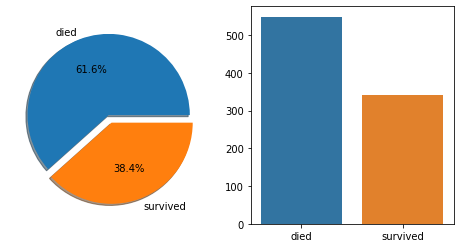

In [24]:
# ===================================================================
# Count of survived
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(8,4))
train_data['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

We saw before that only (38%) of the passengers survived, We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

In [25]:
# Defining functions for Bar plot, Histogram plot and Survival ratio corresponding to the feature used
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = train_data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
def survived_table(feature):
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data = train_data , x = feature , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()

**Sex Vs Survived:**

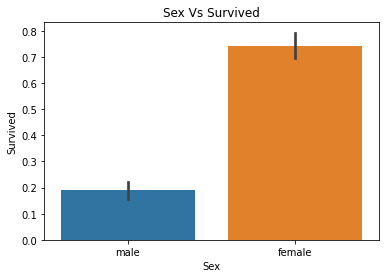

In [26]:
survived_bar_plot('Sex')

In [27]:
survived_table("Sex")

,Sex,Survived
0,female,0.742038
1,male,0.188908


Females have higher Survival rate (74%)

**Pclass vs Survived:**

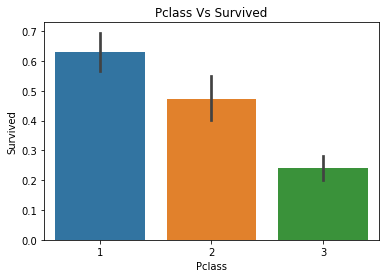

In [28]:
survived_bar_plot("Pclass")

In [29]:
survived_table("Pclass")

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Passengers from Pclass First are more likely to survive then Second Pclass then Third.

**Embarked vs Survived:**

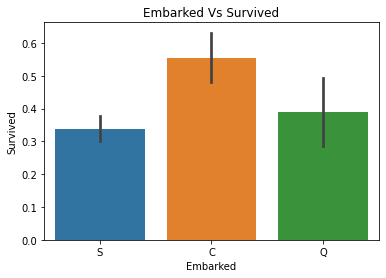

In [30]:
survived_bar_plot("Embarked")

In [31]:
survived_table("Embarked")

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Passengers who used C Embarked are most likely to survive.

**Parch vs Survived:**

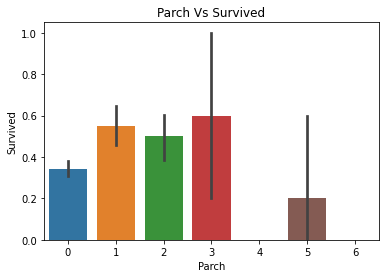

In [32]:
survived_bar_plot("Parch")

In [33]:
survived_table("Parch")

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Parch feature has zero correlation for some values, Maybe we can use it to derive more useful feature.

**SibSp vs Survived**

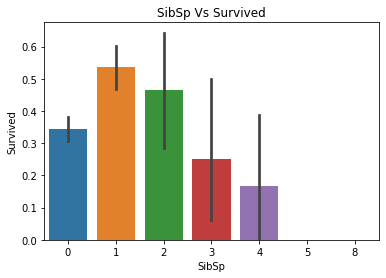

In [34]:
survived_bar_plot("SibSp")

In [35]:
survived_table("SibSp")

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


SibSp feature has zero correlation for some values too, Maybe we can use it to derive more useful feature.

**Age vs Survived:**

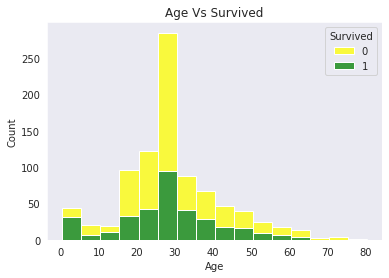

In [36]:
sns.set_style("dark") # to remove the grid.
survived_hist_plot("Age") # Note: This plot is stack plot.

*     Infants (age<=5) and childrens (between 10 and 15 years old) are most likely to survive.
*     most passengers are between 15 and 40 years old.

<AxesSubplot:>

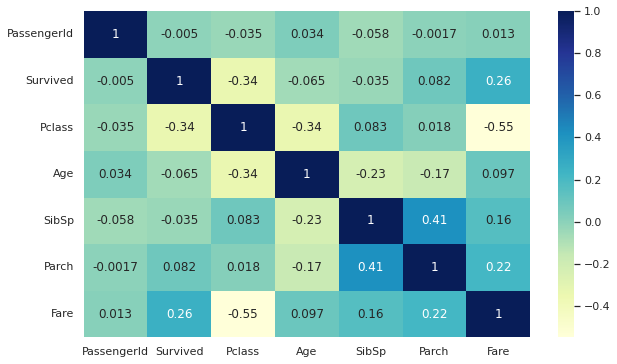

In [37]:
#=======================================================================================
# Discovering the correlations:
#=======================================================================================

sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

* PClass has strong negative correlation with age and Fare.
* Age has negative correlation with parch and sibsp.

In [38]:
train_data['Survived'] = train_data['Survived'].apply(str)

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [40]:
train_data['Pclass'] = train_data['Pclass'].apply(str)

In [41]:
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [42]:
final_train = pd.get_dummies(train_data,columns=["Sex"])
final_train.drop('Sex_female', axis = 1, inplace=True)
final_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,1
887,888,1,1,19.0,0,0,30.0000,S,0
888,889,0,3,28.0,1,2,23.4500,S,0
889,890,1,1,26.0,0,0,30.0000,C,1


In [43]:
final_train = pd.get_dummies(final_train,columns=["Pclass"])
final_train.drop('Pclass_1', axis = 1, inplace=True)
final_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked,Sex_male,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,S,1,0,1
1,2,1,38.0,1,0,71.2833,C,0,0,0
2,3,1,26.0,0,0,7.9250,S,0,0,1
3,4,1,35.0,1,0,53.1000,S,0,0,0
4,5,0,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,S,1,1,0
887,888,1,19.0,0,0,30.0000,S,0,0,0
888,889,0,28.0,1,2,23.4500,S,0,0,1
889,890,1,26.0,0,0,30.0000,C,1,0,0


In [44]:
final_train = pd.get_dummies(final_train,columns=["Embarked"])
final_train.drop('Embarked_C', axis = 1, inplace=True)
final_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,1,1,0,0,1
887,888,1,19.0,0,0,30.0000,0,0,0,0,1
888,889,0,28.0,1,2,23.4500,0,0,1,0,1
889,890,1,26.0,0,0,30.0000,1,0,0,0,0


In [45]:
k = final_train.pop("Survived")

In [46]:
y_train = k
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [47]:
final_train.shape

(891, 10)

In [48]:
#test_data['Survived'] = test_data['Survived'].apply(str)

In [49]:
final_test = pd.get_dummies(test_data,columns=["Sex"])
final_test.drop('Sex_female', axis = 1, inplace=True)
final_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,892,3,34.5,0,0,7.8292,Q,1
1,893,3,47.0,1,0,7.0000,S,0
2,894,2,62.0,0,0,9.6875,Q,1
3,895,3,27.0,0,0,8.6625,S,1
4,896,3,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,S,1
414,1306,1,39.0,0,0,108.9000,C,0
415,1307,3,38.5,0,0,7.2500,S,1
416,1308,3,27.0,0,0,8.0500,S,1


In [50]:
test_data['Pclass'] = test_data['Pclass'].apply(str)

In [51]:
final_test = pd.get_dummies(final_test,columns=["Pclass"])
final_test.drop('Pclass_1', axis = 1, inplace=True)
final_test

,PassengerId,Age,SibSp,Parch,Fare,Embarked,Sex_male,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,Q,1,0,1
1,893,47.0,1,0,7.0000,S,0,0,1
2,894,62.0,0,0,9.6875,Q,1,1,0
3,895,27.0,0,0,8.6625,S,1,0,1
4,896,22.0,1,1,12.2875,S,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,S,1,0,1
414,1306,39.0,0,0,108.9000,C,0,0,0
415,1307,38.5,0,0,7.2500,S,1,0,1
416,1308,27.0,0,0,8.0500,S,1,0,1


In [52]:
final_test = pd.get_dummies(final_test,columns=["Embarked"])
final_test.drop('Embarked_C', axis = 1, inplace=True)
final_test

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,1,0,1,1,0
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,27.0,0,0,8.0500,1,0,1,0,1
414,1306,39.0,0,0,108.9000,0,0,0,0,0
415,1307,38.5,0,0,7.2500,1,0,1,0,1
416,1308,27.0,0,0,8.0500,1,0,1,0,1


In [53]:
final_train

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,1,0,1,0,1
1,2,38.0,1,0,71.2833,0,0,0,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,1
3,4,35.0,1,0,53.1000,0,0,0,0,1
4,5,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,27.0,0,0,13.0000,1,1,0,0,1
887,888,19.0,0,0,30.0000,0,0,0,0,1
888,889,28.0,1,2,23.4500,0,0,1,0,1
889,890,26.0,0,0,30.0000,1,0,0,0,0


In [54]:
features = ['Age','SibSp','Parch','Fare','Sex_male','Pclass_2','Pclass_3','Embarked_Q','Embarked_S']

In [55]:
lm = LogisticRegression(max_iter=4000)

In [56]:
lm.fit(final_train[features],y_train)
lm.score(final_train[features],y_train)

0.8069584736251403

In [57]:
y_pred=lm.predict(final_test[features])
y_pred[0:5]

array(['0', '0', '0', '0', '1'], dtype=object)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
submission = pd.DataFrame()
submission['PassengerId'] = test_data['PassengerId']
submission['Survived'] = y_pred

In [60]:
submission.to_csv("gender_submission.csv",index=False)